In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Čitamo podatke iz zadanog skupa podataka te pregledavamo što se sve nalazi u zadanom skupu podataka.

In [3]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Iz gornje tablice koju smo dobili naredbom describe() možemo izvući neke zaključke.<br>
1.) očito imamo 299 očitanja odnosno ulaznih vrijednosti. Znači dani skup podataka se sastoji od 299 unesenih pacijenata tj informacija o tim pacijentima.<br>
2.) Sve varijable su numeričke odnosno nema niti jedne deskriptivne varijable što je dobro.<br>
3.) Varijable anaemia, diabetes, high_blood_pressure, sex, smoking i DEATH_EVENT su binarne varijable odnosno poprimaju vrijednosti iz skupa (0,1)<br>
4.) Najmanja vrijednost u godinama je 40, a najveća je 95 godina. Srednja vrijednost starosti je 60.83 što zaokružujemo na 61 godinu. Zbog toga mogu reći da su uneseni podaci od pacijenata koji su uglavnom u starijoj dobnoj skupini.<br>



Donjom naredbom provjeravamo trebamo li čistiti podatke odnosno imamo li nekih podataka koji nedostaju (null vrijednosti). Kao što možemo vidjeti iz pregleda samog skupa podataka za očekivati je da takvih slučajeva nećemo imati jer je skup podataka uredno ispunjen.

In [5]:
is_null = data.isnull().sum()
for i in is_null:
    if i != 0:
        print('Ima NULL vrijednosti.')
print('Skup podataka je čist. Nema NULL vrijednosti.')

Skup podataka je čist. Nema NULL vrijednosti.


Donjom naredbom želimo provjeriti naš sami cilj odnosno pogledati postoji li disbalans u podatcima. Naime naš skup podataka će biti treniran za predviđanje smirti uzrokovane zatajenjem srca te zbog toga provjeravamo varijablu 'DEATH_EVENT' jer nam upravo ona govori o tome koliko je od 299 upisanih pacijenata zapravo i umrlo prilikom unosa ovih podataka.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

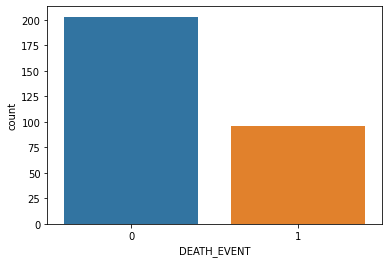

In [6]:
sns.countplot(x = data["DEATH_EVENT"])

Kao što je prikazano na ovom histogramu vidimo da je preživjelih znatno više od umrlih te zbog toga zaključujemo da je promatrani skup podataka disbalansiran. Znači broj umrlih i živućih pacijenata nije jednak.

Sada ćemo napraviti matricu korelacije svih varijabli kako bi mogli dodatno pregledati dani skup podataka.

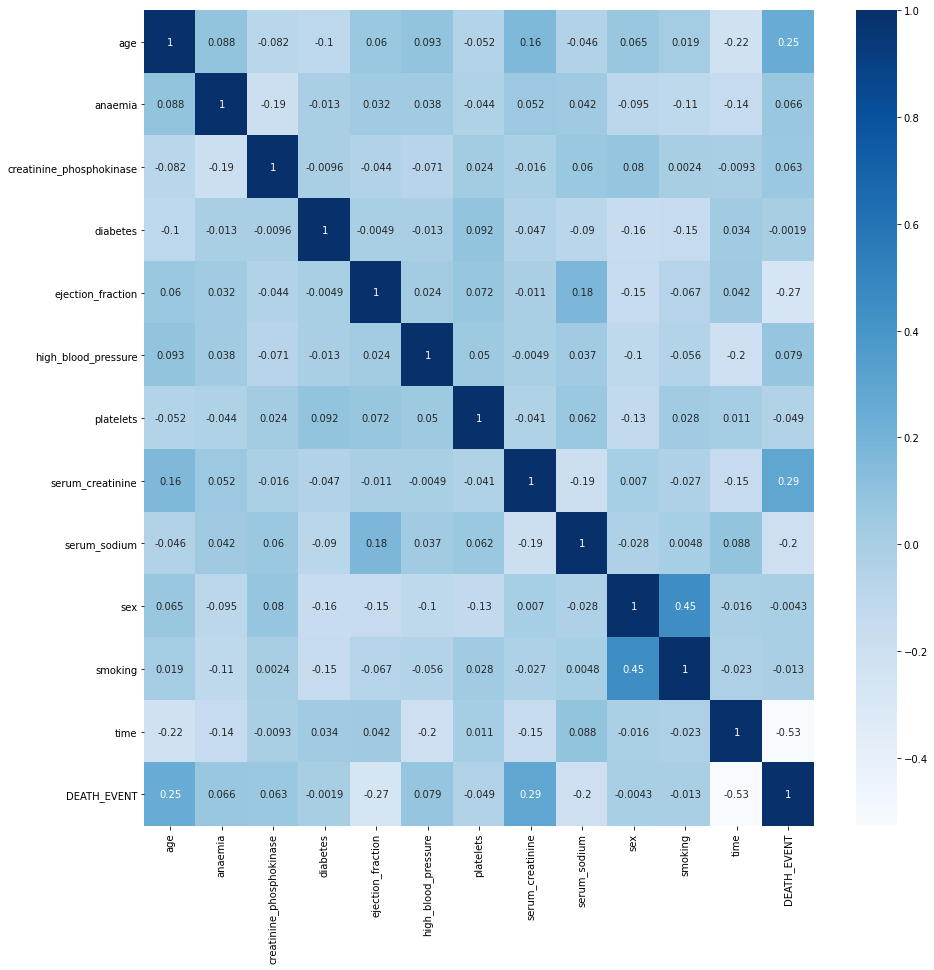

In [7]:
corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True, cmap = 'Blues');

Iz gornje matrice korelacije vidljivo je da su za DEATH_EVENT varijablu najbitnije varijable time, age, ejection_fraction i serum_creatinine (tim redoslijedom). Prve dvije varijable imaju negativan koeficijent korelacije što znači da kako x raste tako y opada (prikazano u nastavku) ali i dalje je očuvana linearna veza samo što je nagib pravca negativan.

In [8]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

Još ćemo samo pogledati ima li velikih odstupanja u danom skupu podataka jer takva pojava bi mogla uzrokovati krivo predviđanje. No, vidjet ćemo hoćemo li uklanjati te podatke koji su "oulier"-i jer u predviđanju smrtnosti baš ti pacijenti koji odstupaju znaju biti ključni za dobar razvoj modela odnosno njihovim uklanjanjem mogli bi dobiti "overfitting" što nije poželjna pojava u strojnom učenju.

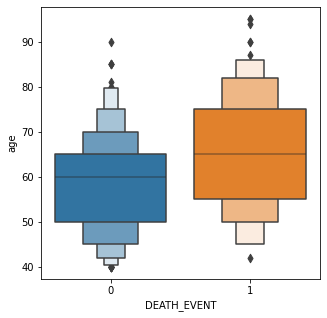

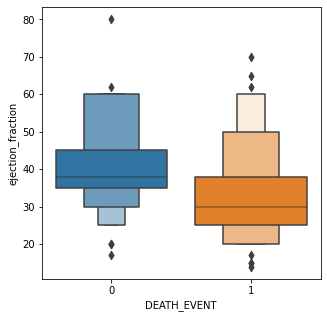

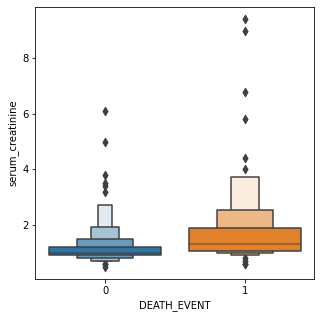

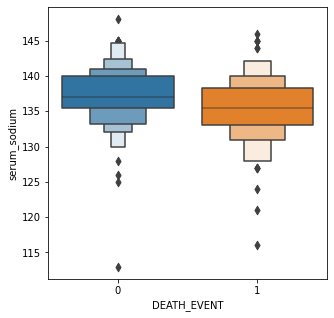

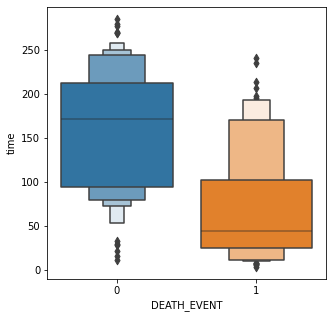

In [9]:
feature = ["age","ejection_fraction","serum_creatinine", "serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(5,5))
    sns.boxenplot(x=data["DEATH_EVENT"], y=data[i])
    plt.show()

Zbog ovih podataka moj model će se sadržavati od varijabli **age, time, ejection_fraction,serum_sodium i serum_creatinine** .

# Sckiti-learn feature selection

In [10]:
x = data.drop('DEATH_EVENT', axis = 1) #ovo su svi featuri bez ciljnog featura
# x.head()
y = data['DEATH_EVENT']

age:
  chi2-statistic: 44.619454569378306
  p-value: 2.3930198121206025e-11
anaemia:
  chi2-statistic: 0.7465934114891604
  p-value: 0.387556924759485
creatinine_phosphokinase:
  chi2-statistic: 1897.3148392611265
  p-value: 0.0
diabetes:
  chi2-statistic: 0.0006568144499178924
  p-value: 0.9795537403764981
ejection_fraction:
  chi2-statistic: 79.07254117185322
  p-value: 5.987070922617961e-19
high_blood_pressure:
  chi2-statistic: 1.221538529204786
  p-value: 0.2690589262568509
platelets:
  chi2-statistic: 26135.77198989343
  p-value: 0.0
serum_creatinine:
  chi2-statistic: 19.81411768817292
  p-value: 8.534994947989536e-06
serum_sodium:
  chi2-statistic: 1.6181745073077758
  p-value: 0.20334651444684076
sex:
  chi2-statistic: 0.001956265975995817
  p-value: 0.9647213115147079
smoking:
  chi2-statistic: 0.032346828817734236
  p-value: 0.8572685693681174
time:
  chi2-statistic: 3826.8926612912724
  p-value: 0.0


<AxesSubplot:>

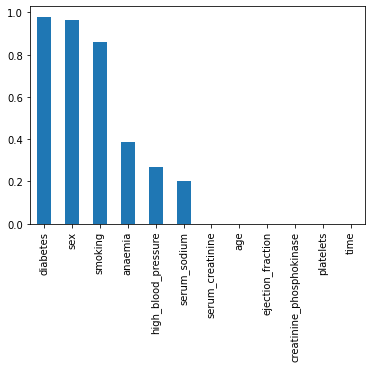

In [11]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
chi, p = chi2(x, y)
features = data.columns
#print(features)
k = 0
for i,j in zip(chi,p):
    print(f'{features[k]}:\n  chi2-statistic: {i}\n  p-value: {j}')
    k += 1
    
p_values = pd.Series(p,index = x.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

Gore vidimo rezultate chi2 testa i p vrijednosti. Sada s obzirom na chi2-statistic uzimamo najbolja obilježja.<br>
Najbolja obilježja će biti ona koja imaju najveću vrijednost chi2 testa, a to su u ovom skupu podataka: **age, ejection-fraction i serum_creatinin** 

In [12]:
mi = mutual_info_classif(x,y,discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
rez = {}
for index, value in enumerate(mi):
    rez[features[index]]=value
    print(f'{features[index]}->{value}')

age->0.05317086404385507
anaemia->0.002329684004961363
creatinine_phosphokinase->0.04965751495197934
diabetes->0.0
ejection_fraction->0.06409537675671095
high_blood_pressure->0.0021571998840475004
platelets->0.0
serum_creatinine->0.05871874388367959
serum_sodium->0.06209891984839988
sex->0.014614017353186792
smoking->0.0
time->0.2461598623433472


gore vidimo mutual information between each feature and the target. Mutual information je:. Prema tome uzimamo one koji imaju največu vrijednost s obzriom na target.

In [13]:
from collections import Counter
k = Counter(rez)

high = k.most_common(5) 
for k,v in high:
    print(f'{k} : {v}')

time : 0.2461598623433472
ejection_fraction : 0.06409537675671095
serum_sodium : 0.06209891984839988
serum_creatinine : 0.05871874388367959
age : 0.05317086404385507


Gore vidimo 5 najutjecajnijih featurea na naš ciljani feature DEATH_EVENT. Zanimljivo je da se pojavio creatinine_phosphokinase jer on u korelacijskim testovima nije bio značajan. 
<br>
Novi model: **age, serum_creatinine, time, ejection_fraction i  creatinine_phosphokinase**

## K-najbliži susjedi

Sada ćemo predstavljene modele istrenirati te provjeriti koliko su točni.

In [14]:
#kreiranje 1.modela
x1 = data[['ejection_fraction', 'serum_creatinine','serum_sodium','time', 'age']]
y = data['DEATH_EVENT']
#Odvajanje training i testing seta - omjer 3:7
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.3)

Accuracy: 85.56%


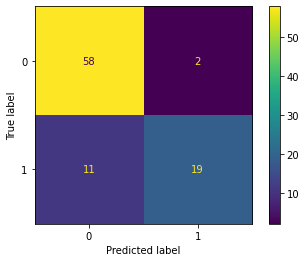

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn import metrics

#kreiranje knn klasifikatora
knn = KNeighborsClassifier(n_neighbors=17) # k = sqrt(n)

#treniranje modela
knn.fit(x1_train, y_train)

#predviđanje
y_pred = knn.predict(x1_test)

# Točnost modela
print(f'Accuracy: {round(100*metrics.accuracy_score(y_test, y_pred),2)}%')

plot_confusion_matrix(knn, x1_test, y_test)
plt.show()

In [16]:
#kreiranje 2.modela
x2 = data[['ejection_fraction', 'serum_creatinine','age']]

#Odvajanje training i testing seta - omjer 3:7
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.3)

Accuracy: 82.22%


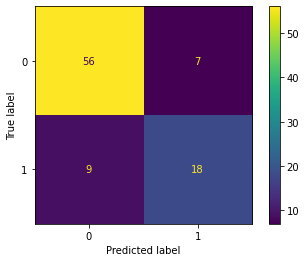

In [17]:
#kreiranje knn klasifikatora
knn = KNeighborsClassifier(n_neighbors=17) # k = sqrt(n)

#treniranje modela
knn.fit(x2_train, y_train)

#predviđanje
y_pred = knn.predict(x2_test)

# Točnost modela
print(f'Accuracy: {round(100*metrics.accuracy_score(y_test, y_pred),2)}%')

plot_confusion_matrix(knn, x2_test, y_test)
plt.show()

In [18]:
#kreiranje 3.modela
x3 = data[['ejection_fraction', 'serum_creatinine', 'age','time', 'creatinine_phosphokinase']]
#Odvajanje training i testing seta - omjer 3:7
x3_train,x3_test,y_train,y_test=train_test_split(x3,y,test_size=0.3)

Accuracy: 77.78%


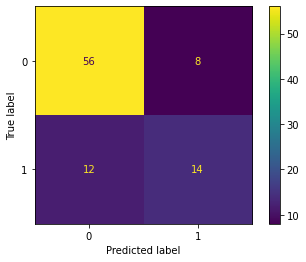

In [19]:
#kreiranje knn klasifikatora
knn = KNeighborsClassifier(n_neighbors=17) # k = sqrt(n)

#treniranje modela
knn.fit(x3_train, y_train)

#predviđanje
y_pred = knn.predict(x3_test)

# Točnost modela
print(f'Accuracy: {round(100*metrics.accuracy_score(y_test, y_pred),2)}%')

plot_confusion_matrix(knn, x3_test, y_test)
plt.show()

## Slučajna šuma

U prethodnom klasifikatoru smo već napravili modele i binarni klasifikator y pa to ne moramo ponovo napraviti.

Accuracy: 61.11%


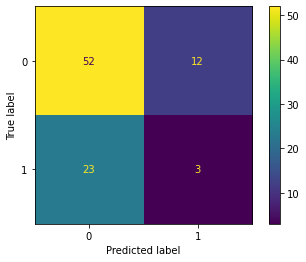

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x1_train,y_train)
y_predict=rfc.predict(x1_test)

print(f'Accuracy: {round(100*metrics.accuracy_score(y_test, y_predict),2)}%')

plot_confusion_matrix(rfc, x1_test, y_test)
plt.show()

Accuracy: 64.44%


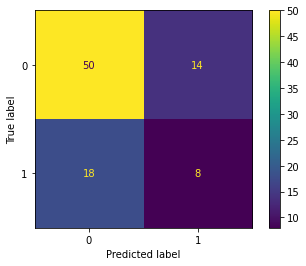

In [28]:
rfc=RandomForestClassifier()
rfc.fit(x2_train,y_train)

y_predict=rfc.predict(x2_test)

print(f'Accuracy: {round(100*metrics.accuracy_score(y_test, y_predict),2)}%')

plot_confusion_matrix(rfc, x2_test, y_test)
plt.show()

Accuracy: 81.11%


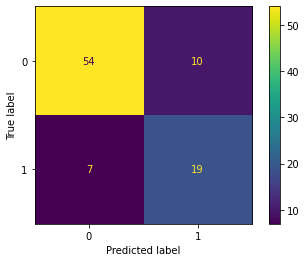

In [29]:
rfc=RandomForestClassifier()
rfc.fit(x3_train,y_train)
y_predict=rfc.predict(x3_test)

print(f'Accuracy: {round(100*metrics.accuracy_score(y_test, y_predict),2)}%')

plot_confusion_matrix(rfc, x3_test, y_test)
plt.show()

## Linear SVM